<br>
importing lib 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accur acy_score

In [5]:
heart_attack_datasets = pd.read_csv('heart.csv')
heart_attack_datasets.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<br>
About this dataset
<br>
Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

Value 1: typical angina
Value 2: atypical angina
Value 3: non-anginal pain
Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
<!-- trtbps : resting blood pressure (in mm Hg) -->

rest_ecg : resting electrocardiographic results

Value 0: normal
Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [7]:
heart_attack_datasets.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
heart_attack_datasets.shape

(303, 14)

In [9]:
heart_attack_datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
heart_attack_datasets.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [11]:
heart_attack_datasets.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [14]:
heart_attack_datasets.duplicated().sum()

1

In [15]:
heart_attack_datasets= heart_attack_datasets.drop_duplicates()

In [16]:
heart_attack_datasets.duplicated().sum()

0

In [17]:
heart_attack_datasets.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
heart_attack_datasets.describe().corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,0.975149,0.975871,0.901047,0.330701,0.974855,0.975516,0.868821,0.974999,0.976947,0.975748,0.975948,0.976553,0.975118
sex,0.975149,1.000000,0.999979,0.786593,0.136505,0.999992,0.999994,0.738086,0.999995,0.999862,0.999991,0.999941,0.999970,1.000000
cp,0.975871,0.999979,1.000000,0.788672,0.141500,0.999974,0.999992,0.740186,0.999982,0.999941,0.999985,0.999982,0.999971,0.999980
trtbps,0.901047,0.786593,0.788672,1.000000,0.670488,0.786146,0.787773,0.982115,0.786335,0.792433,0.788163,0.789434,0.790201,0.786511
chol,0.330701,0.136505,0.141500,0.670488,1.000000,0.136458,0.139246,0.686178,0.136532,0.150302,0.139073,0.144153,0.141879,0.136447
fbs,0.974855,0.999992,0.999974,0.786146,0.136458,1.000000,0.999991,0.737091,0.999995,0.999877,0.999984,0.999957,0.999955,0.999992
restecg,0.975516,0.999994,0.999992,0.787773,0.139246,0.999991,1.000000,0.739111,0.999992,0.999911,0.999990,0.999969,0.999972,0.999995
thalachh,0.868821,0.738086,0.740186,0.982115,0.686178,0.737091,0.739111,1.000000,0.737566,0.743387,0.739951,0.740306,0.742534,0.737983
exng,0.974999,0.999995,0.999982,0.786335,0.136532,0.999995,0.999992,0.737566,1.000000,0.999874,0.999992,0.999954,0.999966,0.999995
oldpeak,0.976947,0.999862,0.999941,0.792433,0.150302,0.999877,0.999911,0.743387,0.999874,1.000000,0.999885,0.999977,0.999880,0.999863


In [21]:
heart_attack_datasets.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
heart_attack_datasets = heart_attack_datasets.drop(columns=['caa','thall'],axis = 1)

In [24]:
heart_attack_datasets.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


<Figure size 640x480 with 0 Axes>

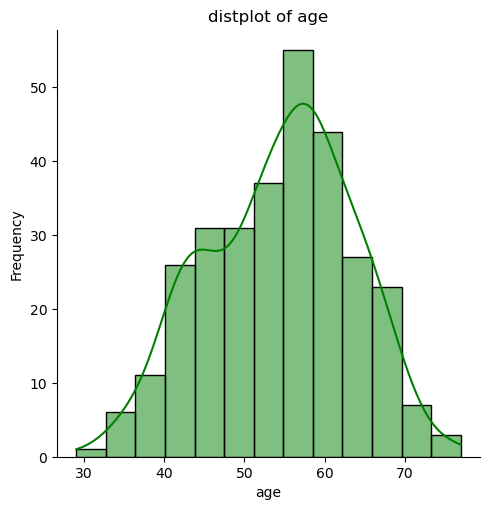

<Figure size 640x480 with 0 Axes>

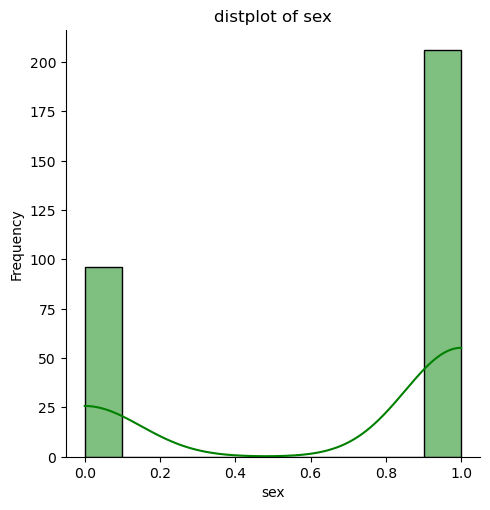

<Figure size 640x480 with 0 Axes>

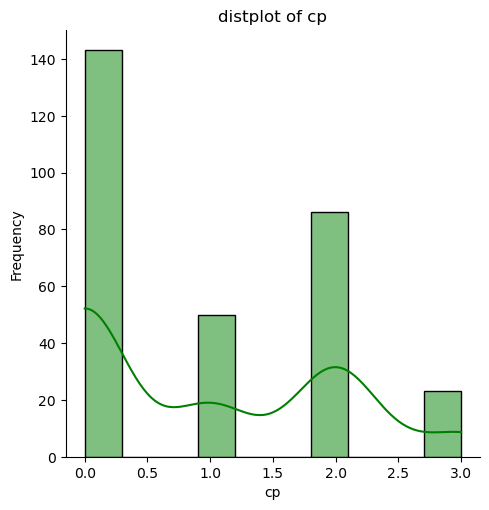

<Figure size 640x480 with 0 Axes>

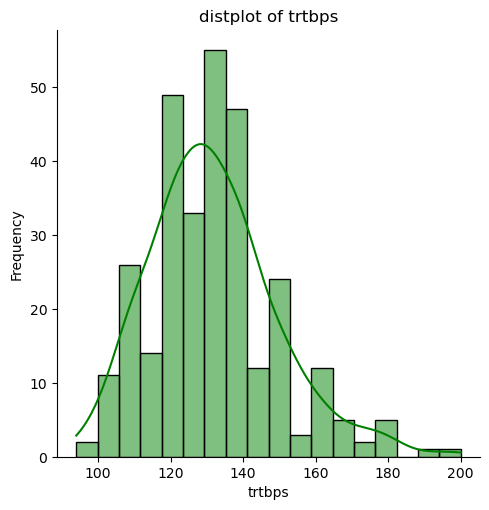

<Figure size 640x480 with 0 Axes>

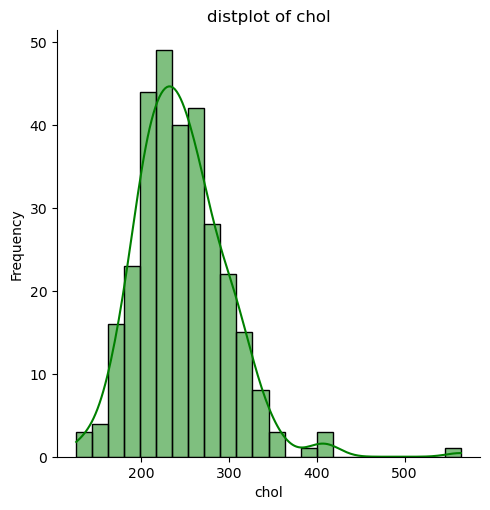

<Figure size 640x480 with 0 Axes>

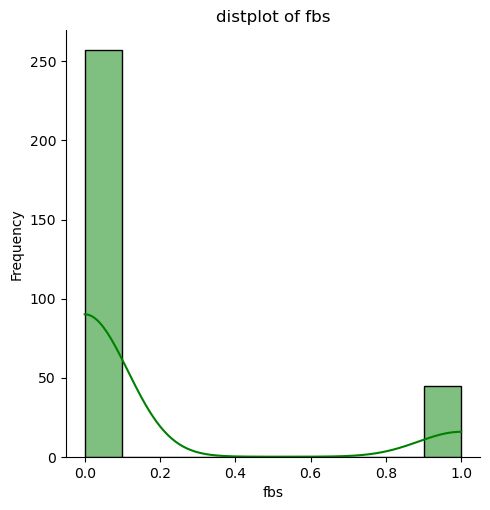

<Figure size 640x480 with 0 Axes>

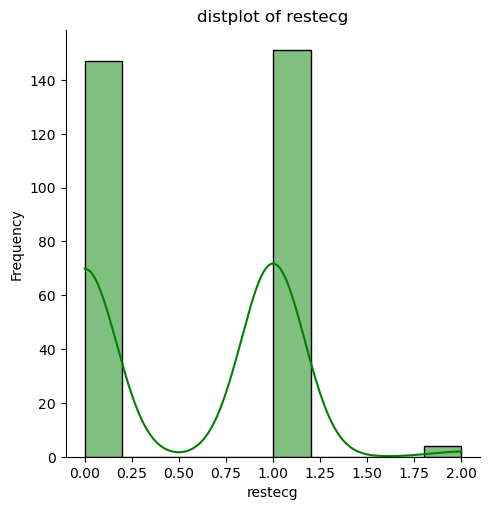

<Figure size 640x480 with 0 Axes>

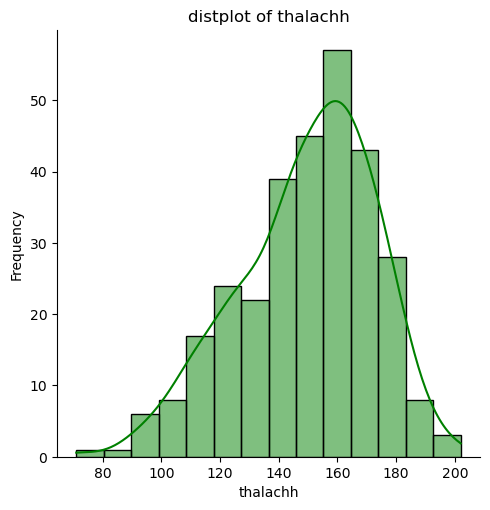

<Figure size 640x480 with 0 Axes>

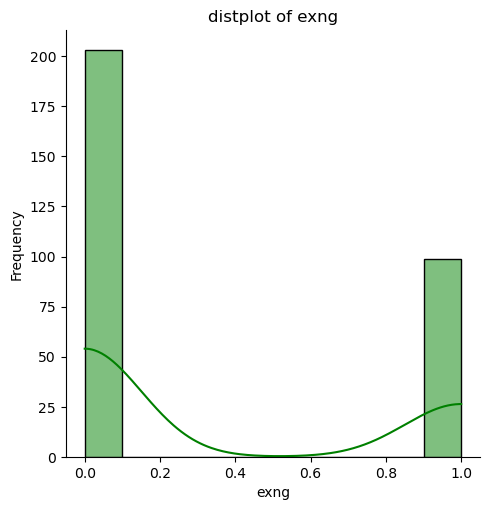

<Figure size 640x480 with 0 Axes>

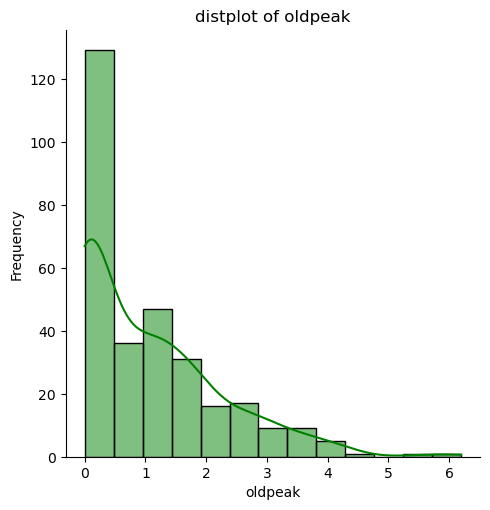

<Figure size 640x480 with 0 Axes>

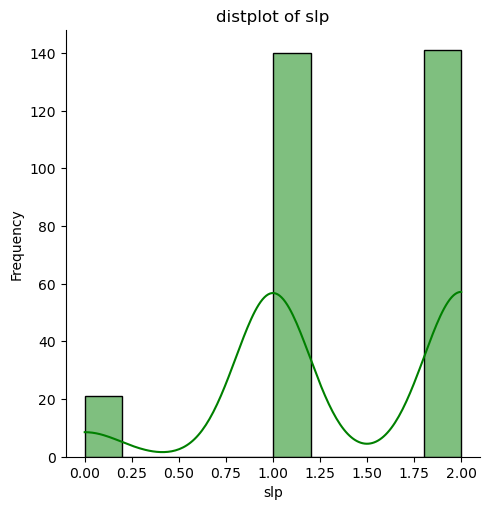

<Figure size 640x480 with 0 Axes>

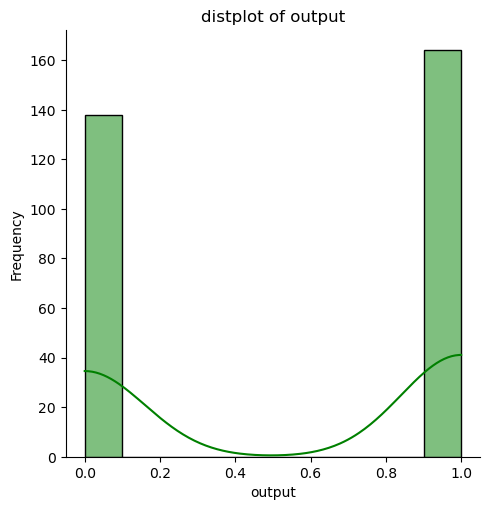

In [25]:
for column in heart_attack_datasets.columns:
     
        # fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
        plt.figure()# Create a new figure for each plot
        sns .displot(heart_attack_datasets[column],color = "g",kde=True)  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'distplot of {column}')  # Set plot titl
        plt.show() 
     

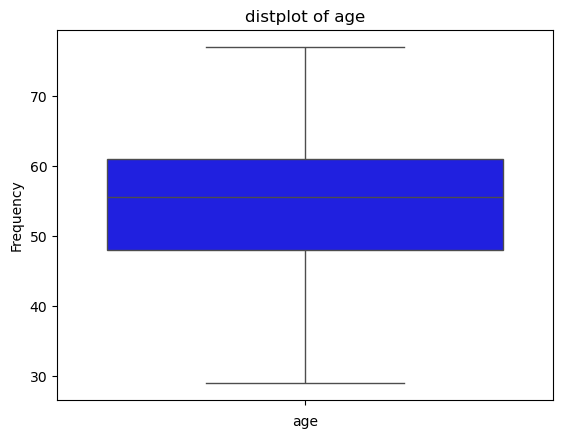

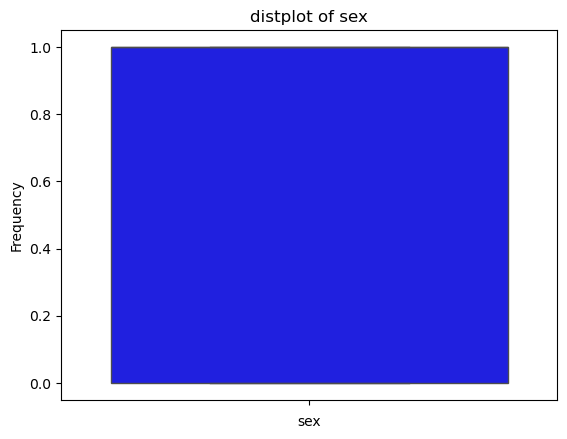

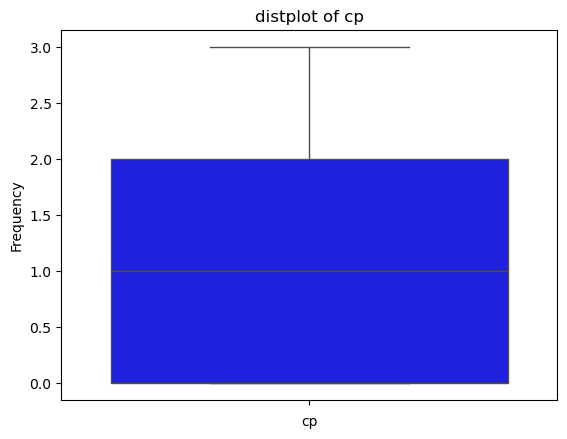

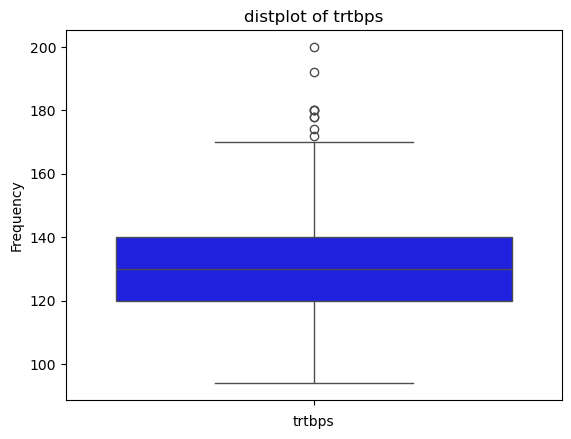

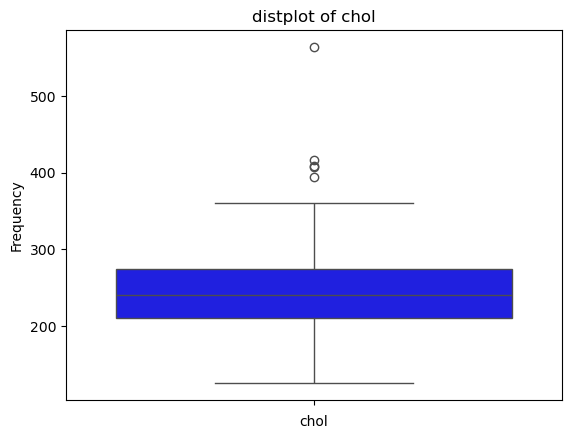

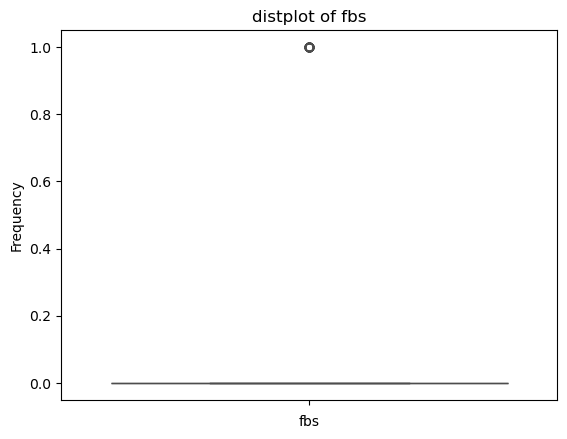

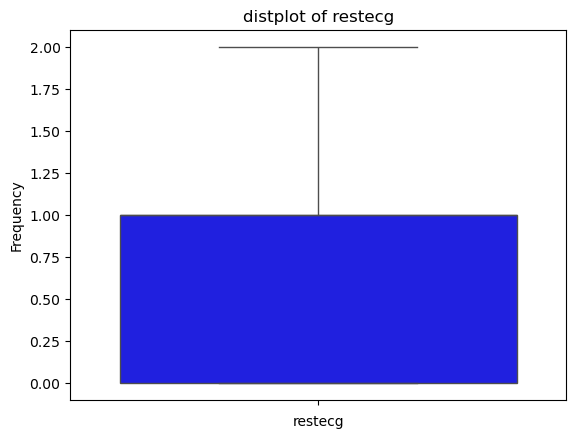

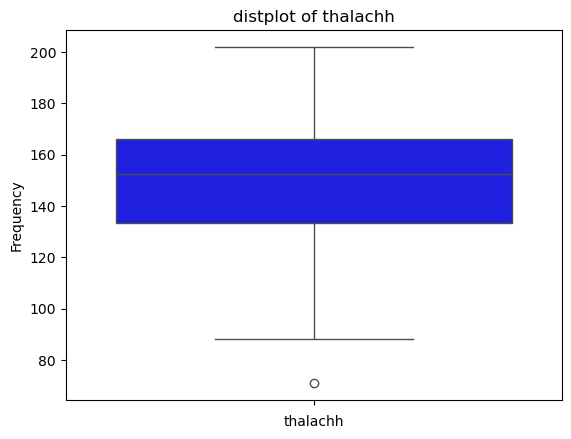

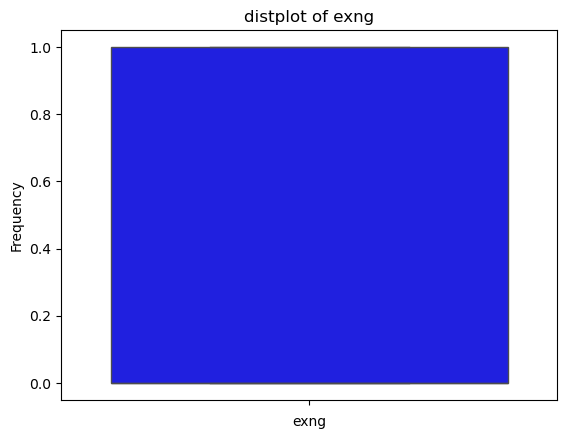

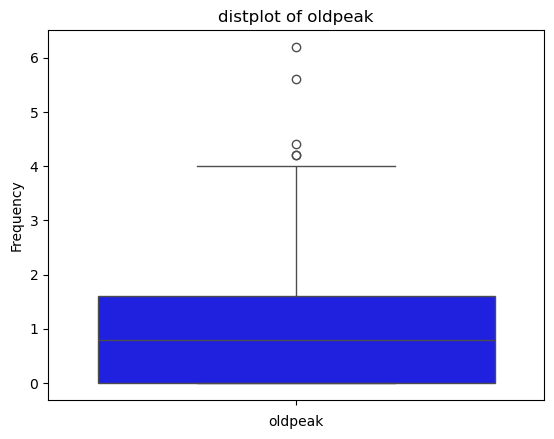

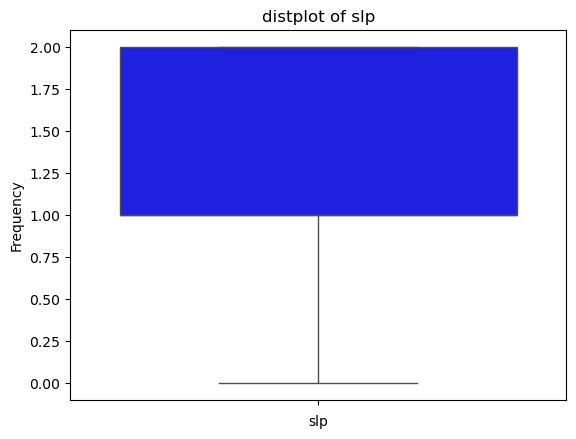

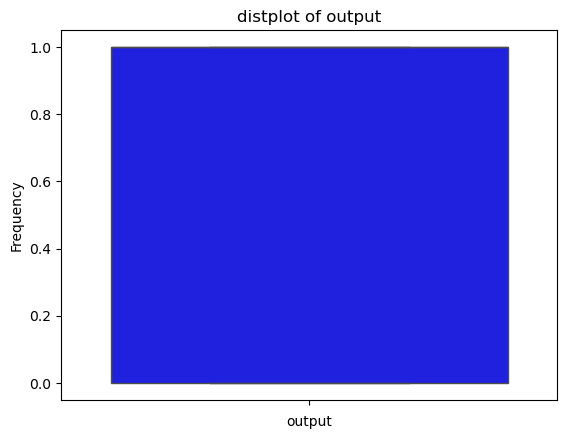

In [28]:
# now cheking the outlies in the tow columns 
for column in heart_attack_datasets.columns:
    
        plt.figure()# Create a new figure for each plot
        sns.boxplot(heart_attack_datasets[column],color = 'b')  # Plot histogram with 10 bins
        plt.xlabel(column)  # Set x-axis label as the column name
        plt.ylabel('Frequency')  # Set y-axis label
        plt.title(f'distplot of {column}')  # Set plot titl
        plt.show() 
 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


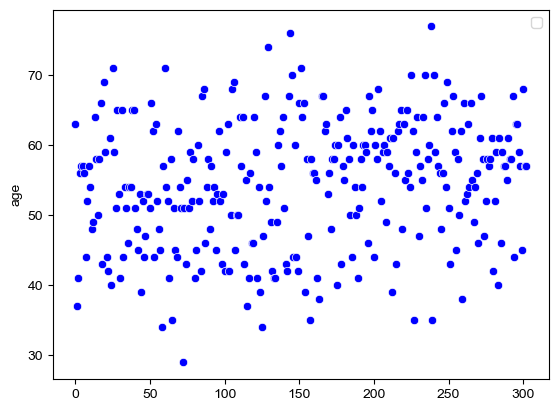

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


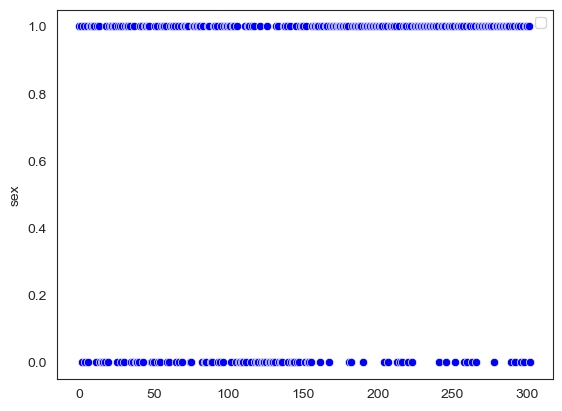

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


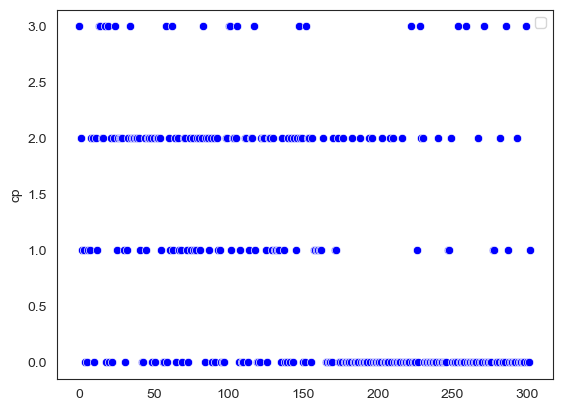

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


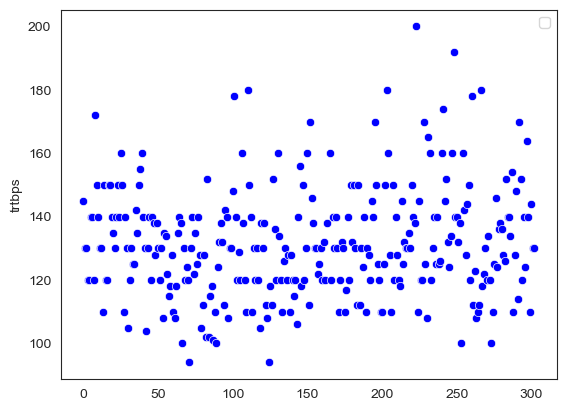

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


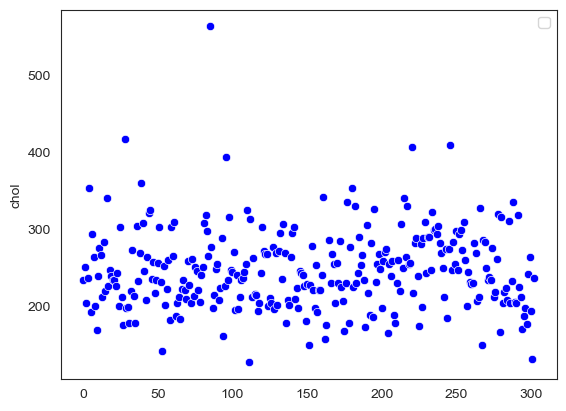

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


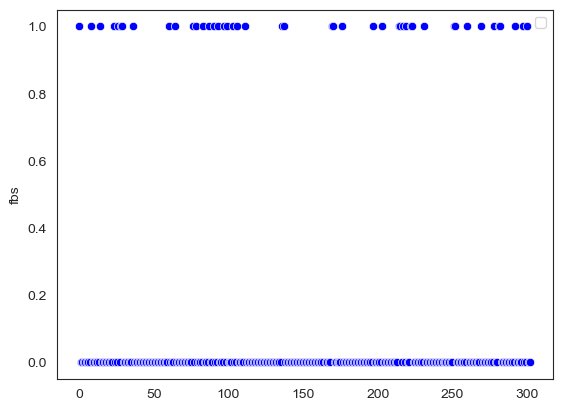

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


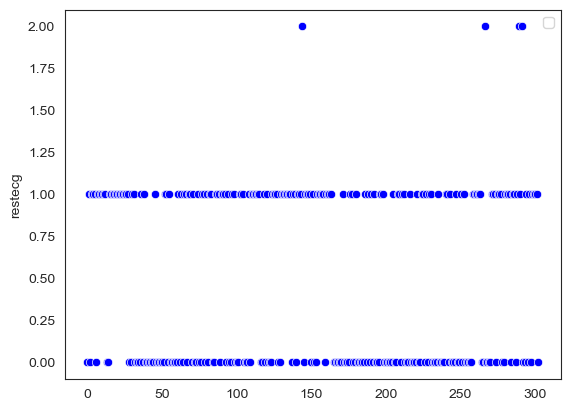

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


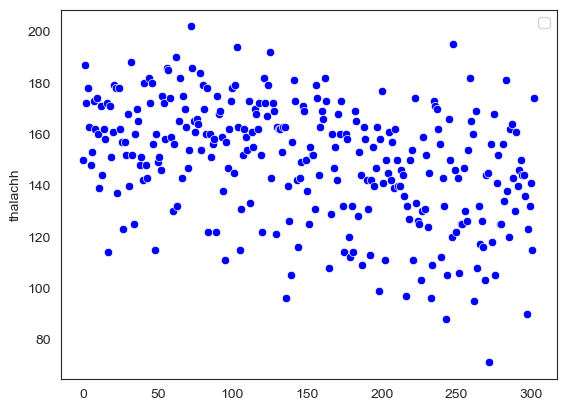

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


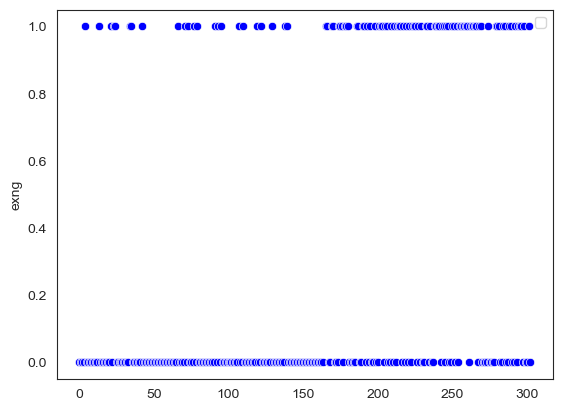

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


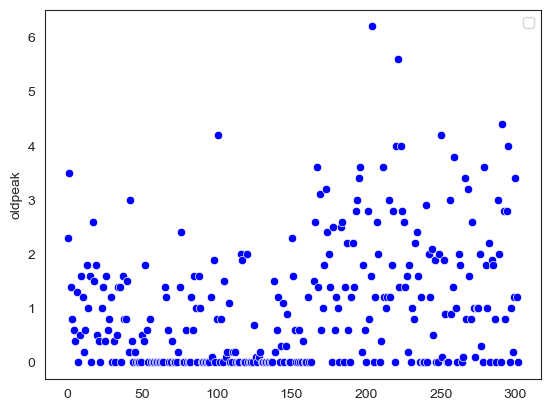

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


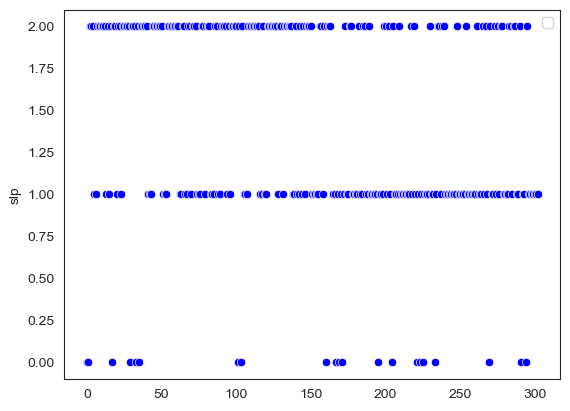

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


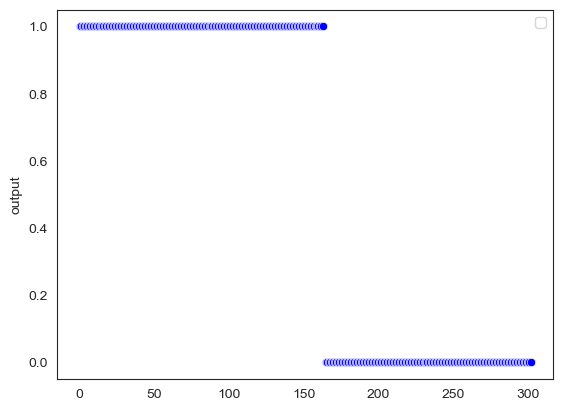

In [30]:
# plt.figure(figsize = (14,7))
# here in the not mean centring 
for column in heart_attack_datasets.columns:
    
  sns.scatterplot(heart_attack_datasets[column],color = 'b')
  sns.set_style("white")
  plt.legend()
  plt.show()

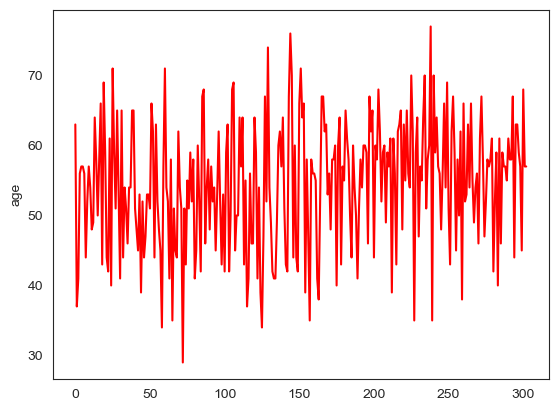

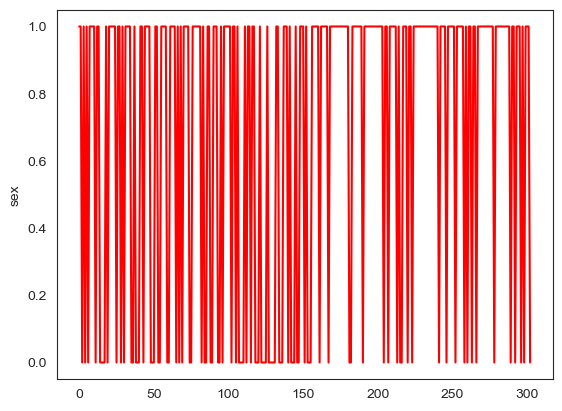

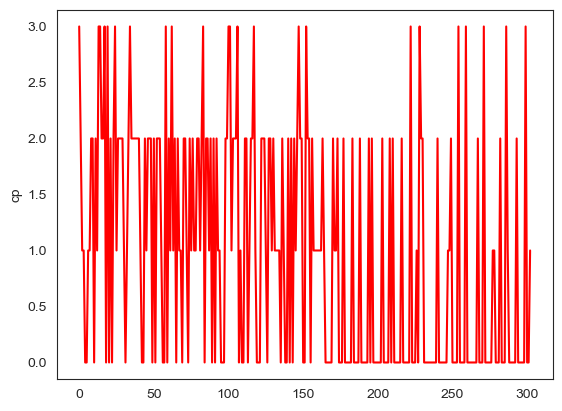

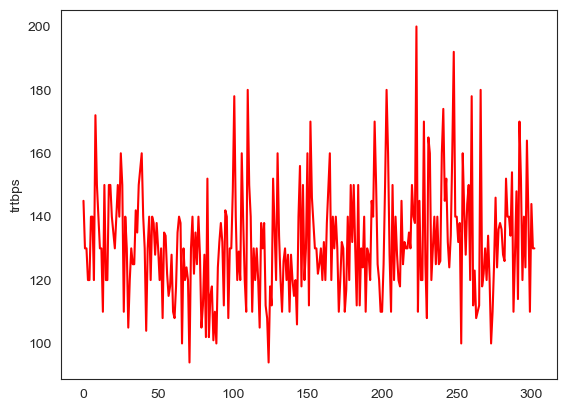

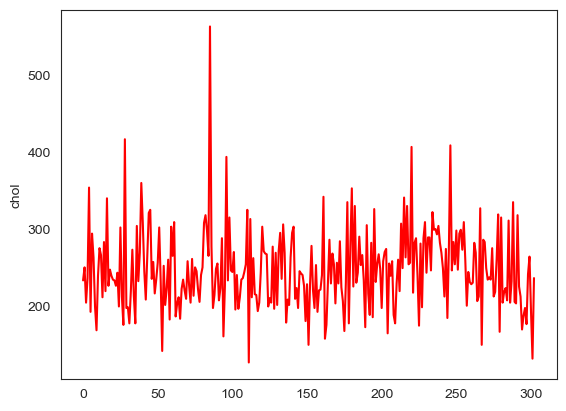

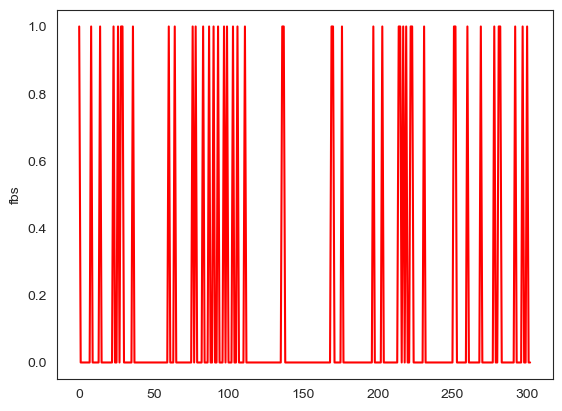

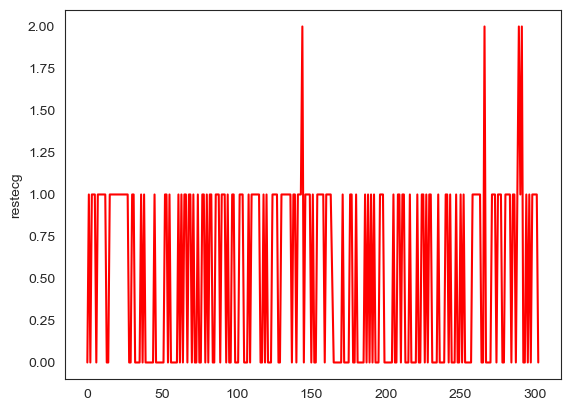

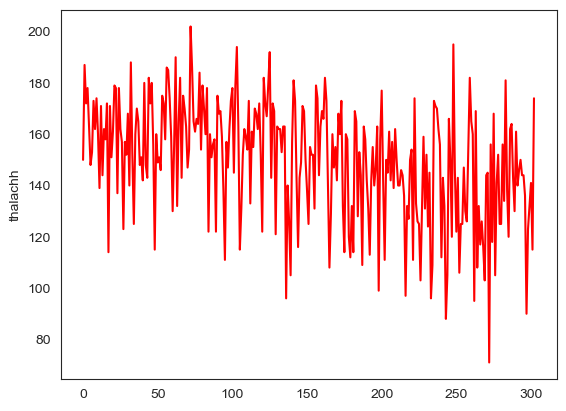

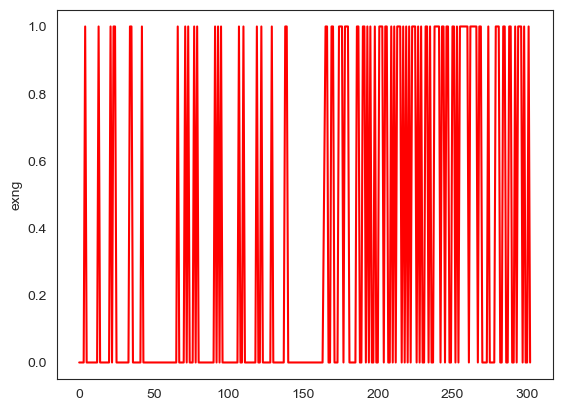

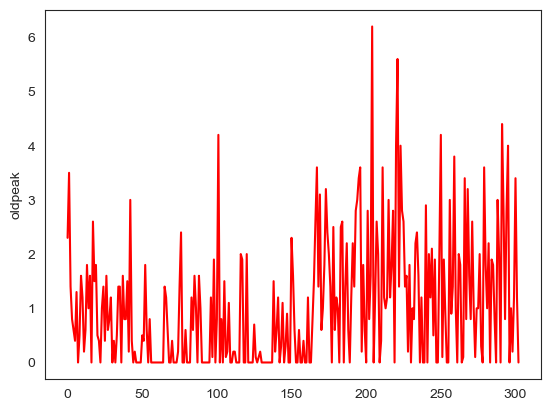

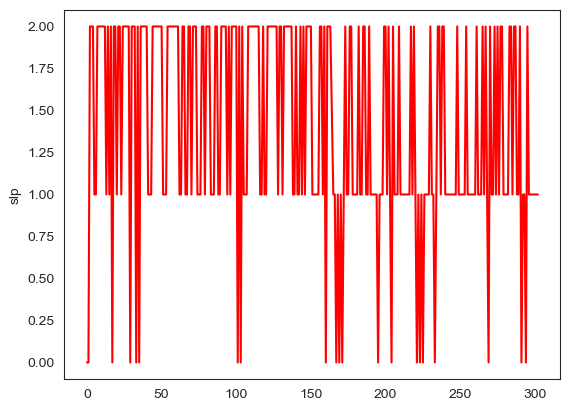

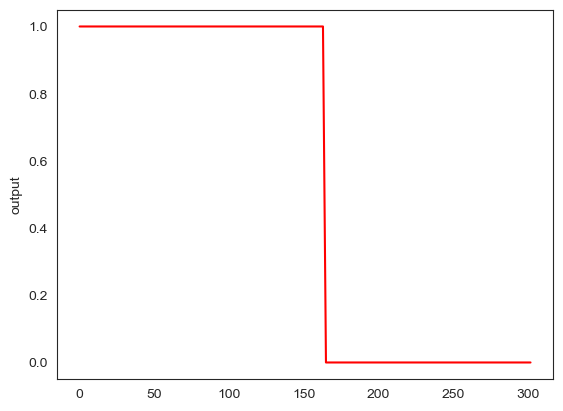

In [33]:
# plt.figure(figsize = (14,7))
for column in heart_attack_datasets.columns:

   sns.lineplot(heart_attack_datasets[column],color = 'r')
   plt.show()

In [35]:
correlation_matrix = heart_attack_datasets.describe().corr()
correlation_matrix

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,output
age,1.000000,0.975149,0.975871,0.901047,0.330701,0.974855,0.975516,0.868821,0.974999,0.976947,0.975748,0.975118
sex,0.975149,1.000000,0.999979,0.786593,0.136505,0.999992,0.999994,0.738086,0.999995,0.999862,0.999991,1.000000
cp,0.975871,0.999979,1.000000,0.788672,0.141500,0.999974,0.999992,0.740186,0.999982,0.999941,0.999985,0.999980
trtbps,0.901047,0.786593,0.788672,1.000000,0.670488,0.786146,0.787773,0.982115,0.786335,0.792433,0.788163,0.786511
chol,0.330701,0.136505,0.141500,0.670488,1.000000,0.136458,0.139246,0.686178,0.136532,0.150302,0.139073,0.136447
fbs,0.974855,0.999992,0.999974,0.786146,0.136458,1.000000,0.999991,0.737091,0.999995,0.999877,0.999984,0.999992
restecg,0.975516,0.999994,0.999992,0.787773,0.139246,0.999991,1.000000,0.739111,0.999992,0.999911,0.999990,0.999995
thalachh,0.868821,0.738086,0.740186,0.982115,0.686178,0.737091,0.739111,1.000000,0.737566,0.743387,0.739951,0.737983
exng,0.974999,0.999995,0.999982,0.786335,0.136532,0.999995,0.999992,0.737566,1.000000,0.999874,0.999992,0.999995
oldpeak,0.976947,0.999862,0.999941,0.792433,0.150302,0.999877,0.999911,0.743387,0.999874,1.000000,0.999885,0.999863


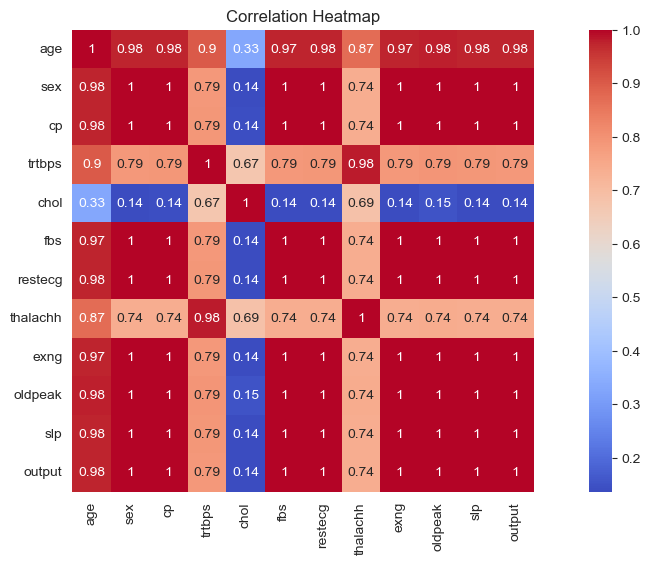

In [44]:
plt.figure(figsize=(14, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_3944\2583314823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')


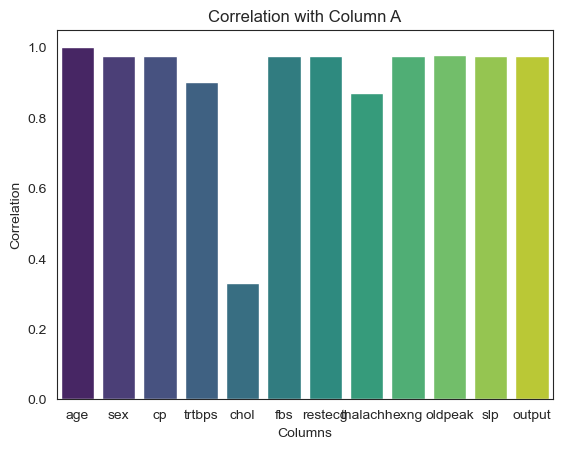

In [41]:
# plt.figure(figsize=(10, 5))
sns.barplot(x=correlation_matrix.columns, y=correlation_matrix.iloc[0], palette='viridis')
plt.title('Correlation with Column A')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.show()

In [42]:
heart_attack_datasets.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,output
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1
2,41,0,1,130,204,0,0,172,0,1.4,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,1


In [43]:
x = onlinefood_datasets.drop('output',axis = 1)
y = onlinefood_datasets['output']

NameError: name 'onlinefood_datasets' is not defined